<a href="https://colab.research.google.com/github/giannismantzaris-cmd/DAMA61/blob/main/DAMA61_WA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
# Install seaborn package
!pip install seaborn

In [40]:
#install libraries
import seaborn as sns
import pandas as pd
import numpy as np

In [32]:
#load my dataset
mpg = sns.load_dataset("mpg")

In [ ]:
#inspect a few initial values
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [33]:
# Pinpointing the predictors and target variables. The target variable is the output we want to predict, thus mpg. All the rest are the predictors.
target = "mpg"
predictors = [col for col in mpg.columns if col != target]
print("Target variable:", target)
print("Predictor variables:", predictors)

Target variable: mpg
Predictor variables: ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'name']


Features likely influencing fuel efficiency:
- cylinders, displacement, horsepower, and weight are expected to infuence mpg
- model_year likely has a positive effect as newer cars tend to be more efficient
- acceleration may have a small positive or neutral effect.

In [ ]:
#dataset info
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [34]:
#check number of missing values per column
mpg.isna().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,6
weight,0
acceleration,0
model_year,0
origin,0
name,0


In [35]:
# compute descriptive statistics
mpg.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
horsepower,392.0,104.469388,38.491160,46.0,75.000,93.5,126.000,230.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model_year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0


Discuss on the data:
We have 9 features, 7 are numerical and 2 are categorical. Generally we dont have missing values, except from "horsepower" where we have 6 missing entries. We notice broad ranges indicating a variaty of car types.Different scales and units in numerical data suggest that we will need to standardize data to further explore patterns.

In [36]:
# Removing rows with missing values and create the clean dataset
mpg_clean = mpg.dropna()

# Remove categorical columns 'origin' and 'name'
mpg_clean = mpg_clean.drop(columns=["origin", "name"])

#Valdate the new datraset is as it should
mpg_clean.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70


In [37]:
mpg_clean.isna().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,0
weight,0
acceleration,0
model_year,0


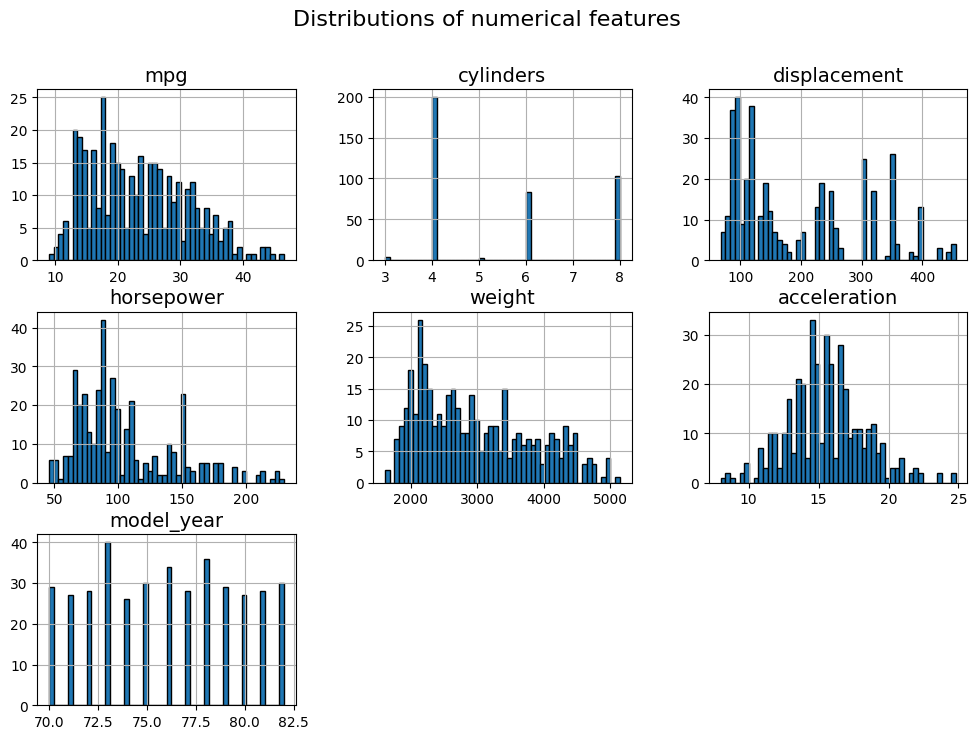

In [38]:
import matplotlib.pyplot as plt

# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

mpg_clean.hist(bins=50, figsize=(12, 8), edgecolor="black")
plt.suptitle("Distributions of numerical features", fontsize=16)
plt.show()

We notice that several features such as displacement, horsepower, and weight are right-skewed. Acceleration and model_year look closer to uniform or normal. The right-skewed features can be made more Gaussian-like by applying a logarithmic transformation which reduces skewness and improves the symmetry of their distributions.

In [43]:
#transform skewed features (log1p transformation)on a copy

mpg_tf = mpg_clean.copy()

# Apply log1p transformation to skewed numerical features
mpg_tf["displacement_log1p"] = np.log1p(mpg_tf["displacement"])
mpg_tf["horsepower_log1p"] = np.log1p(mpg_tf["horsepower"])
mpg_tf["weight_log1p"] = np.log1p(mpg_tf["weight"])

mpg_tf.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,displacement_log1p,horsepower_log1p,weight_log1p
0,18.0,8,307.0,130.0,3504,12.0,70,5.730100,4.875197,8.161946
1,15.0,8,350.0,165.0,3693,11.5,70,5.860786,5.111988,8.214465
2,18.0,8,318.0,150.0,3436,11.0,70,5.765191,5.017280,8.142354
3,16.0,8,304.0,150.0,3433,12.0,70,5.720312,5.017280,8.141481
4,17.0,8,302.0,140.0,3449,10.5,70,5.713733,4.948760,8.146130


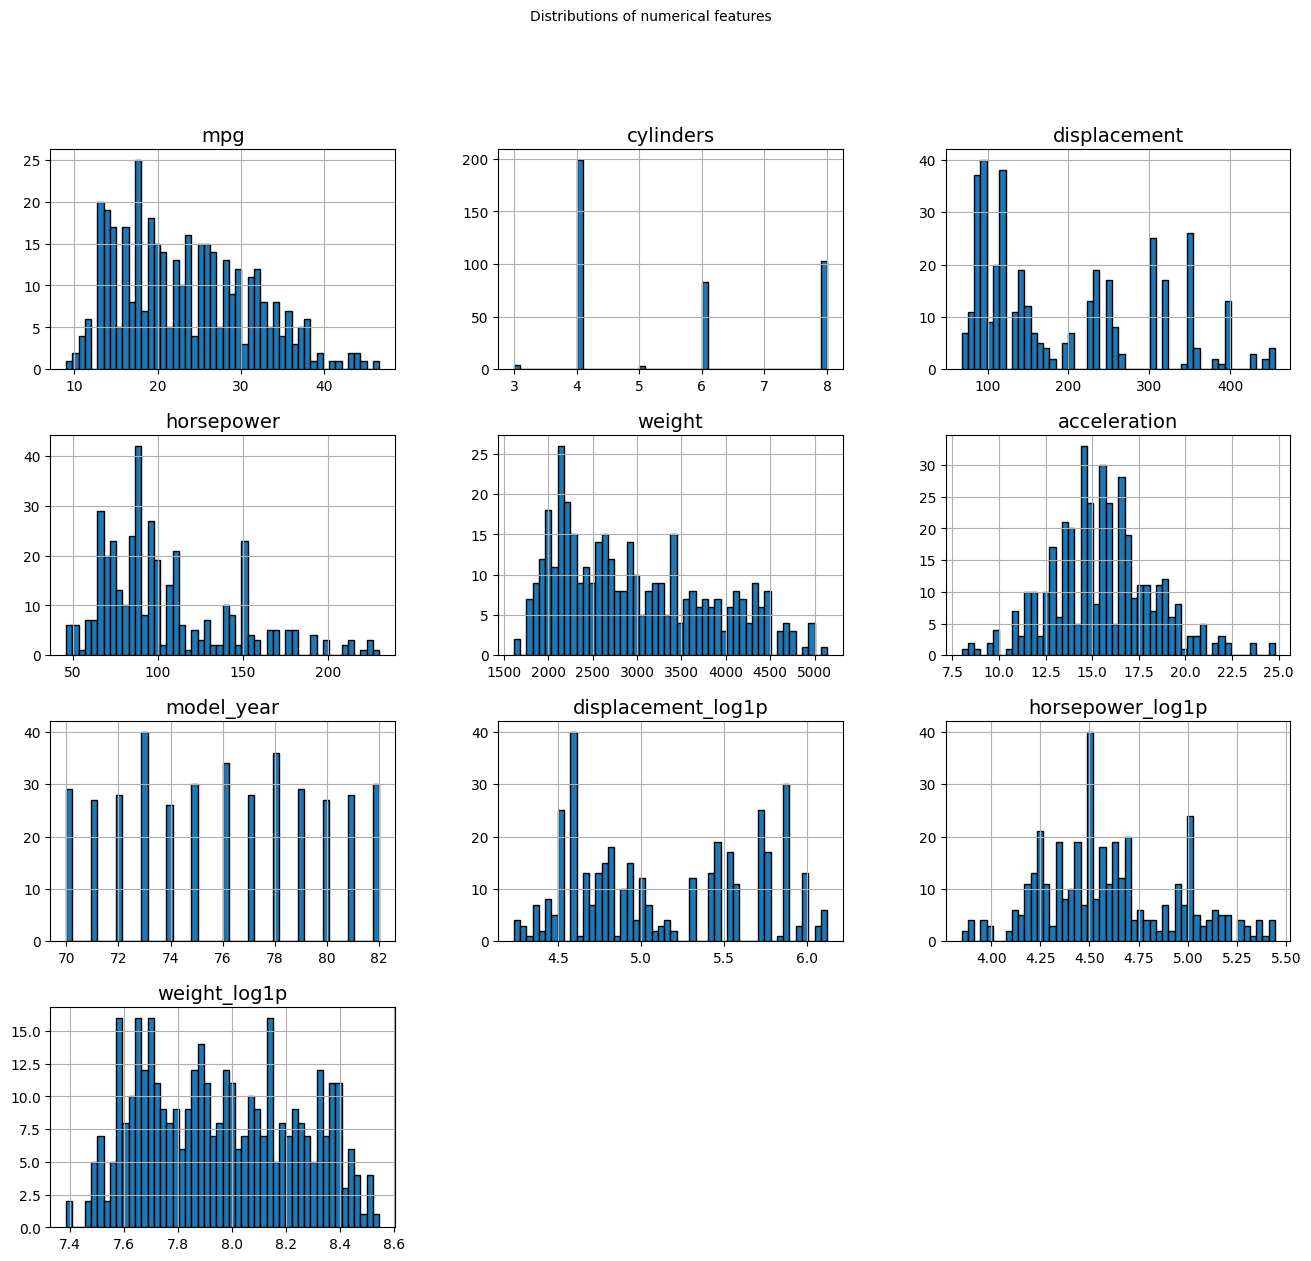

In [54]:
mpg_tf.hist(bins=50, figsize=(16, 14), edgecolor="black")
plt.suptitle("Distributions of numerical features", fontsize=10)
plt.show()

The distributions of displacement, horsepower, and weight became more symmetric after applying a logarithmic (log1p) transformation, reducing their right skewness. This makes the features more Gaussian-like, which helps linear models perform better

In [55]:
#correlation matrix
corr_matrix = mpg_tf.corr(numeric_only=True)

corr_matrix["mpg"].sort_values(ascending=False)

,mpg
mpg,1.000000
model_year,0.580541
acceleration,0.423329
cylinders,-0.777618
horsepower,-0.778427
displacement,-0.805127
horsepower_log1p,-0.817346
displacement_log1p,-0.828442
weight,-0.832244
weight_log1p,-0.844192


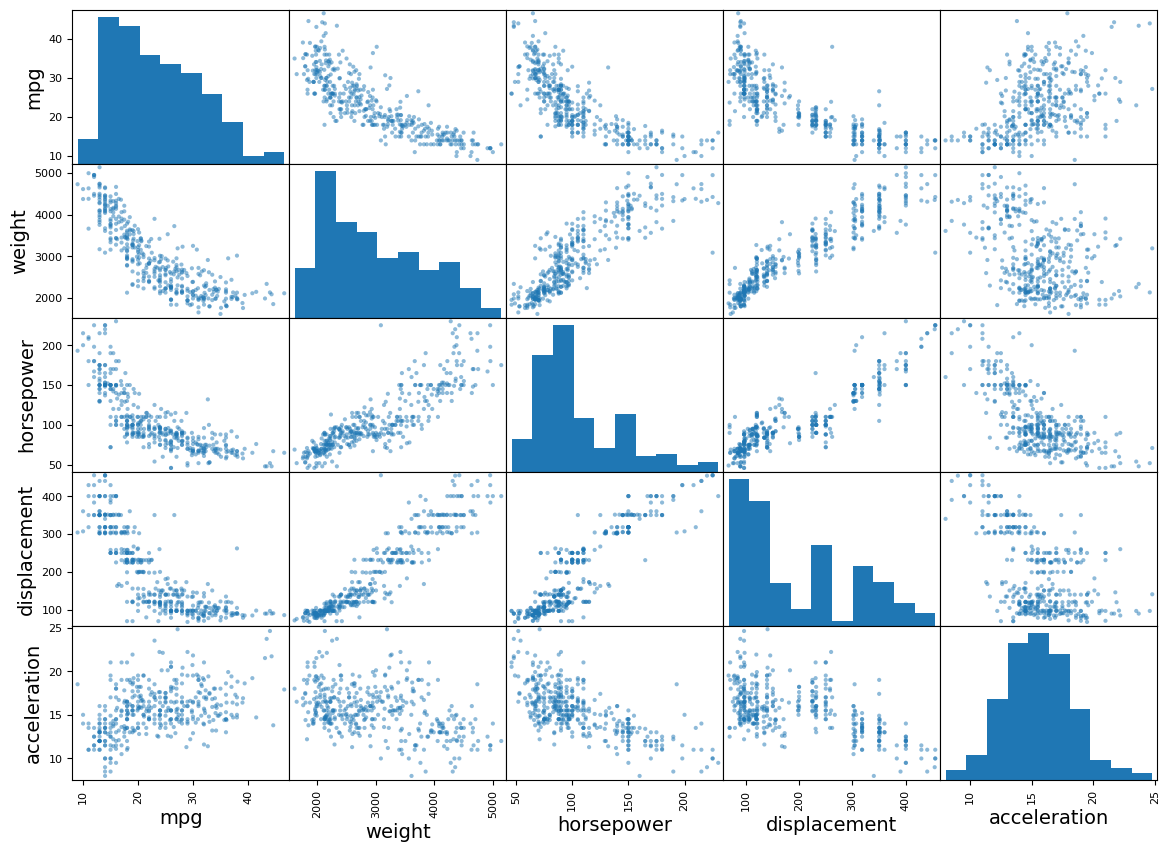

In [59]:
#visualization of correlations
from pandas.plotting import scatter_matrix

attributes = ["mpg", "weight", "horsepower", "displacement", "acceleration"]
scatter_matrix(mpg_tf[attributes], figsize=(14, 10))
plt.show()

From the scatter plots we can extract some information for features corellation:
1. mpg decreases as weight, horsepower, and displacement increase, showing strong negative linear relationships.
2. Acceleration shows only a weak association
3. Horsepower and displacement increase as weight increases (clear positive relationships)

<Axes: >

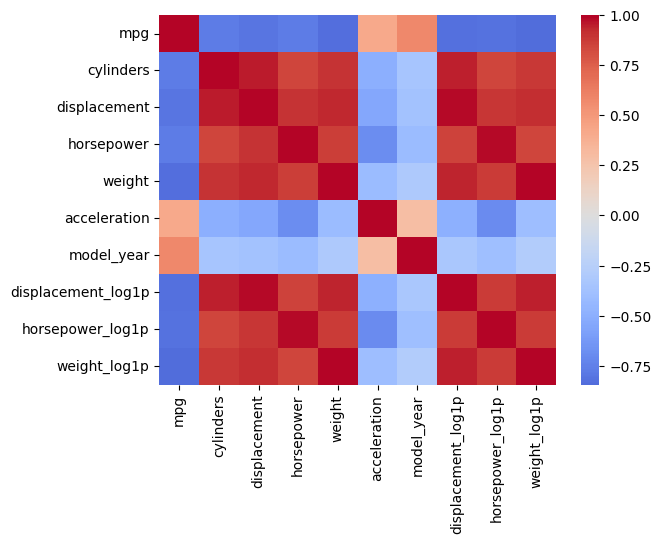

In [60]:
#we can introduce a heatmap to display all the correlation in one image

sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", center=0)

Further to the above, from the heatmap we also extract that weight, displacement and horsepower are also highly correlated with each other, suggesting feature redundancy.
Also model year has a moderate positive correlation with mpg, showing that newer cars are more fuel efficient

In [61]:
#First redifine target and predictors based on the clean dataset
predictors = mpg_clean.drop(columns=["mpg"])
target = mpg_clean["mpg"]

In [62]:
#Split into train (80%) and test (20%) data, ensuring random shuffling and random state 42
from sklearn.model_selection import train_test_split

predictors_train, predictors_test, target_train, target_test = train_test_split(
    predictors, target, test_size=0.2, random_state=42
)

print("Training set size:", predictors_train.shape[0])
print("Test set size:", predictors_test.shape[0])

Training set size: 313
Test set size: 79


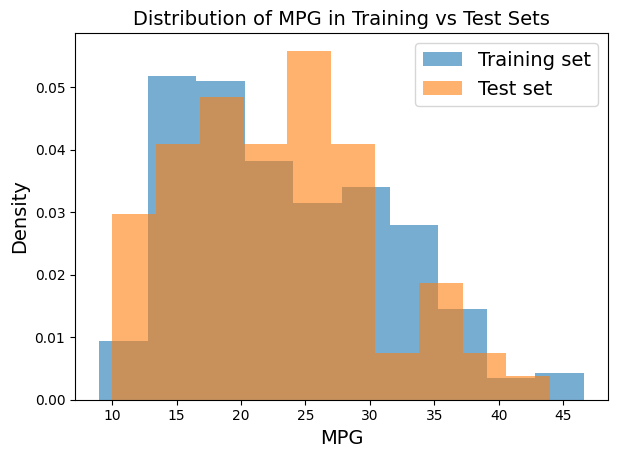

In [64]:
#Histograms with to compare shape
plt.hist(target_train, bins=10, alpha=0.6, density=True, label="Training set")
plt.hist(target_test, bins=10, alpha=0.6, density=True, label="Test set")

plt.title("Distribution of MPG in Training vs Test Sets")
plt.xlabel("MPG")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()

The target variable MPG has a similar distribution in both the training and test sets.
This indicates that the random split preserved the representativeness of the data, and both sets capture the same range and pattern of fuel efficiency values. There is no sampling bias.

In [65]:
#To combine the scaler and the regression in one pipeline as requested, we use Pipeline command

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

#Define and train pipeline
linreg_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("linreg", LinearRegression())
])
linreg_pipeline.fit(predictors_train, target_train)


R² Score:                 0.794
Root Mean Squared Error:  3.241
Mean Absolute Error:      2.504
Mean Absolute % Error:    12.29 %


In [66]:
#Predict mpg
target_pred = linreg_pipeline.predict(predictors_test)

In [77]:
#Evaluate the model
r2  = r2_score(target_test, target_pred)
mse = mean_squared_error(target_test, target_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(target_test, target_pred)
mape = mean_absolute_percentage_error(target_test, target_pred)


In [69]:
r2

0.7942349075428592

In [70]:
mse

10.502370329417298

In [71]:
mae

2.5038600897761243

In [76]:
mape*100

12.29473120091371

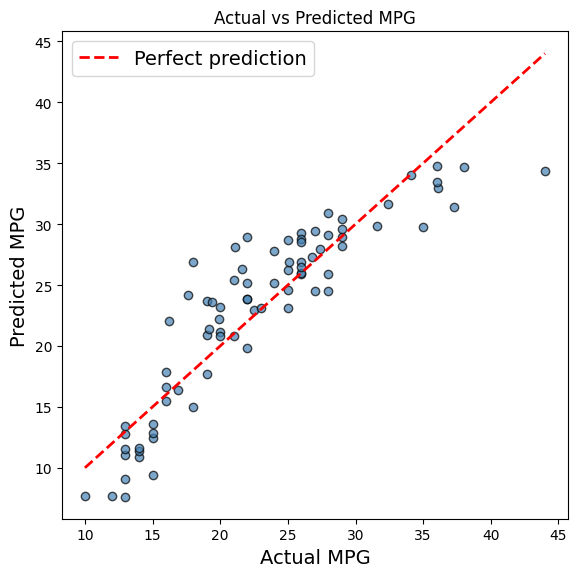

In [79]:
#Actual vs Predicted plot
plt.figure(figsize=(6, 6))
plt.scatter(target_test, target_pred, color="steelblue", alpha=0.7, edgecolor="k")
plt.plot(
    [target_test.min(), target_test.max()],
    [target_test.min(), target_test.max()],
    "r--", lw=2, label="Perfect prediction"
)

plt.title("Actual vs Predicted MPG", fontsize=12)
plt.xlabel("Actual MPG")
plt.ylabel("Predicted MPG")
plt.legend()
plt.tight_layout()
plt.show()

Most points are close to the red dashed line, meaning the model’s predictions follow the actual MPG values quite well.
The R2 score (0.79) shows the model explains most of the data variation, and the errors are small on average.
A few higher-MPG cars are slightly underpredicted, but overall the model performs well.

In [80]:
from sklearn.model_selection import cross_val_score

# 10-fold cross-validation on the same pipeline model
scores = cross_val_score(
    linreg_pipeline, predictors_train, target_train,
    scoring="r2", cv=10
)

print("R² scores for each fold:", np.round(scores, 3))
print("Mean R²:", round(scores.mean(), 3))
print("Standard deviation:", round(scores.std(), 3))

R² scores for each fold: [0.865 0.754 0.797 0.769 0.725 0.783 0.813 0.762 0.85  0.853]
Mean R²: 0.797
Standard deviation: 0.045


The 10-fold cross-validation gave an average R2 of about 0.80 with a small variation (0.05).
This means the model performs consistently across different data splits.
The test R2 (arround 0.79) is within this range, so the model generalizes well and is not overfitting.

Problem 2

In [81]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)

In [82]:
X, y = mnist.data, mnist.target
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [83]:
# Split into training (60,000) and test (10,000) sets
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [84]:
# Verify that maximum pixels are 255
print("Max pixel value:", X.max())

Max pixel value: 255


In [85]:
# Normalize pixel values
X_train = X_train / 255.0
X_test  = X_test / 255.0

In [89]:
#we verify that all pixel values range from 0 to 1
X_train.min()

np.float64(0.0)

In [90]:
X_train.max()

np.float64(1.0)

In [91]:
#Training a Binary Classifier
#But first we need to convert labels to integers, as the % operation fails for string arrays
y_train = y_train.astype(int)
y_test  = y_test.astype(int)

y_train_odd = (y_train % 2 == 1)  # True for all odds, False for all other digits
y_test_odd = (y_test % 2 == 1)

KNeighborsClassifier

In [92]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': [3, 5, 7]}]

knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv=5)
grid_search.fit(X_train[:10_000], y_train_odd[:10_000])

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [3, 5, 7],
                          'weights': ['uniform', 'distance']}])

In [93]:
grid_search.best_params_

{'n_neighbors': 3, 'weights': 'uniform'}

In [94]:
#Get the best model from grid search
best_knn = grid_search.best_estimator_

In [95]:
#3-fold cross-validation for accuracy
from sklearn.model_selection import cross_val_score

cv_acc=cross_val_score(best_knn, X_train, y_train_odd, cv=3, scoring="accuracy")
cv_acc

array([0.98295, 0.9833 , 0.9812 ])

In [97]:
#3-fold cross-validation for precision
cv_prec=cross_val_score(best_knn, X_train, y_train_odd, cv=3, scoring="precision")
cv_prec

array([0.97634971, 0.97775187, 0.97451303])

In [13]:
#3-fold cross-validation for recall
cv_rec=cross_val_score(best_knn, X_train, y_train_odd, cv=3, scoring="recall")
cv_rec

array([0.99046214, 0.9896745 , 0.9888878 ])

In [14]:
print("3CV Accuracy mean and std:", round(cv_acc.mean(), 3), round(cv_acc.std(), 3))
print("3CV Precision mean and std:", round(cv_prec.mean(), 3), round(cv_prec.std(), 3))
print("3CV Recall mean and std:", round(cv_rec.mean(), 3), round(cv_rec.std(), 3))

3CV Accuracy mean and std: 0.982 0.001
3CV Precision mean and std: 0.976 0.001
3CV Recall mean and std: 0.99 0.001


All the metrics on the training set show high performance and very low standard deviation, indicating that the model is stable and performs consistently

In [98]:
#Fit the model and get predictions in test set
best_knn.fit(X_train, y_train_odd)
y_test_pred = best_knn.predict(X_test)

In [99]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [100]:
#model evaluation (test data)
accuracy_score(y_test_odd, y_test_pred)

0.9852

In [101]:
precision_score(y_test_odd, y_test_pred)

0.980491611392899

In [102]:
recall_score(y_test_odd, y_test_pred)

0.9905400078833267

All the metrics on the test set are very close or within the standard deviation of the training set, meaning the model generalizes well

Confusion Matrix

In [103]:
#Use 3-fold cross validation to avoid using the excact same dataset the model was trained on, which would lead to perfect predictions due to overfitting
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(best_knn, X_train, y_train_odd, cv=3)

In [104]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train_odd, y_train_pred)
cm

array([[28756,   736],
       [  315, 30193]])

From the confusion matrix we see 736 False Positive classifications (samples misclassified as odd) and 315 False Negative (misclassified as even)

In [105]:
y_scores = best_knn.predict_proba(X_test)
y_scores

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [107]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test_odd, y_scores[:, 1])
roc_auc = roc_auc_score(y_test_odd, y_scores[:, 1])
roc_auc

np.float64(0.9944736695125702)

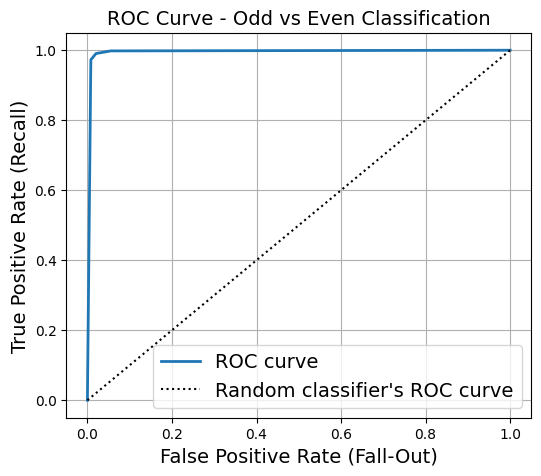

In [108]:
#Plot ROC curve
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting
plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.title("ROC Curve - Odd vs Even Classification")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()